In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import Model, Input, regularizers, utils
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing import image

import glob
from tqdm import tqdm
import os
import random
from torch.utils.data import Dataset
from PIL import Image
import torchvision.transforms as transforms
from torch.nn import functional as F
import torch 


In [4]:
root = 'E:/Download/AniGAN-main/face2anime/human-faces/'
face_images = glob.glob(root + "*.*")

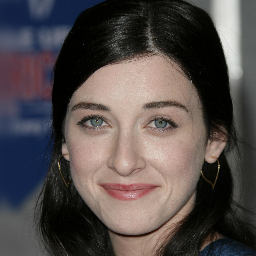

In [3]:
img = utils.load_img(face_images[0])
img

In [4]:
all_images = []

for i in tqdm(face_images):
    img = utils.load_img(i)
    img = utils.img_to_array(img)
    img = img/255.0
    all_images.append(img)

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 243.88it/s]


In [5]:
all_images = np.array(all_images)

# split data into train and validation data
train_x, test_x = train_test_split(all_images, random_state=32, test_size=0.1)

In [10]:
Input_img = Input(shape=(256, 256, 3))  
    
#encoding architecture
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(Input_img)

x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)

x2 = MaxPool2D( (2, 2))(x2)

x3 = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)

x4 = Conv2D(32, (3, 3), activation='relu', padding='same')(x3)

x4 = MaxPool2D( (2, 2))(x4)

encoded = Conv2D(16, (3, 3), activation='relu', padding='same')(x4)


# decoding architecture

x5 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)

x5 = UpSampling2D((2, 2))(x5)

x6 = Conv2D(32, (3, 3), activation='relu', padding='same')(x5)

x7 = Conv2D(64, (3, 3), activation='relu', padding='same')(x6)
x7 = UpSampling2D((2, 2))(x7)

x8 = Conv2D(128, (3, 3), activation='relu', padding='same')(x7)

x9 = Conv2D(256, (3, 3), activation='relu', padding='same')(x8)

decoded = Conv2D(3, (3, 3), padding='same')(x9)



autoencoder = Model(Input_img, decoded)

autoencoder.compile(optimizer='adam', loss='mse')

In [11]:
autoencoder

In [12]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_11 (Conv2D)          (None, 256, 256, 256)     7168      
                                                                 
 conv2d_12 (Conv2D)          (None, 256, 256, 128)     295040    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 128, 128, 128)    0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 128, 128, 64)      73792     
                                                                 
 conv2d_14 (Conv2D)          (None, 128, 128, 32)      18464     
                                                           

In [13]:
a_e = autoencoder.fit(train_x, train_x,
            epochs=10,
            batch_size=5,
            shuffle=True)

Epoch 1/10
18/18 [==============================] - 185s 10s/step - loss: 0.2455
Epoch 2/10
18/18 [==============================] - 182s 10s/step - loss: 0.0429
Epoch 3/10
18/18 [==============================] - 174s 10s/step - loss: 0.0180
Epoch 4/10
18/18 [==============================] - 184s 10s/step - loss: 0.0117
Epoch 5/10
18/18 [==============================] - 173s 10s/step - loss: 0.0095
Epoch 6/10
18/18 [==============================] - 163s 9s/step - loss: 0.0079
Epoch 7/10
18/18 [==============================] - 165s 9s/step - loss: 0.0075
Epoch 8/10
18/18 [==============================] - 165s 9s/step - loss: 0.0066
Epoch 9/10
18/18 [==============================] - 164s 9s/step - loss: 0.0062
Epoch 10/10
18/18 [==============================] - 164s 9s/step - loss: 0.0061


In [14]:
predictions = autoencoder.predict(test_x)

1/1 [==============================] - 4s 4s/step


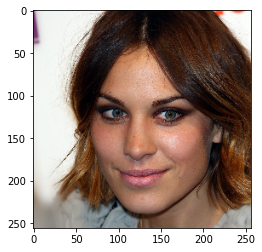

In [28]:
plt.imshow(predictions[3])